In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import misc
from PIL import Image

In [2]:
img = Image.open('peppers-large.tiff')
imarr = np.array(img)

imarr = imarr/255
imarr.shape

(512, 512, 3)

In [3]:
def dist(a,b):
    return np.square(a[0]-b[0]) + np.square(a[1]-b[1]) + np.square(a[2]-b[2])

In [4]:
imarr[45][87]

array([0.57647059, 0.75686275, 0.35294118])

In [5]:
clust = 10
centroid = np.zeros((clust,3))
for i in range(clust):
    centroid[i] = np.random.rand(3)
centroid.shape

(10, 3)

In [6]:
assign = np.zeros((imarr.shape[0],imarr.shape[1]),dtype=np.int64)
assign.shape

(512, 512)

In [7]:
def near(centroid,a):
    mind = 3.544
    minc = 0
    for i in range(centroid.shape[0]):
        k = dist(centroid[i],a)
        if(k<mind):
            mind = k
            minc = i
    return minc

In [8]:
def iterate(centroid,imagecomp):
    newcen = np.zeros((centroid.shape[0],3))
    newcenc = np.zeros((centroid.shape[0]))
    for i in range(assign.shape[0]):
        for j in range(assign.shape[1]):
            k = near(centroid,imarr[i][j])
            newcen[k] += imarr[i][j]
            newcenc[k] += 1
            imagecomp[i][j] = centroid[k]*255
            
    for i in range(centroid.shape[0]):
        if(newcenc[i]!=0):
            centroid[i] = newcen[i]/newcenc[i]
            

In [9]:
iterations = 10
imagecomp = np.empty_like(imarr,dtype = np.uint8)
for i in range(iterations):
    iterate(centroid,imagecomp)
    print(i)
centroid

0
1
2
3
4
5
6
7
8
9


array([[0.73544161, 0.83333384, 0.68692981],
       [0.76362015, 0.18885833, 0.1591979 ],
       [0.51847491, 0.13268449, 0.10979549],
       [0.78129725, 0.40585273, 0.2603126 ],
       [0.44699164, 0.48849583, 0.23026999],
       [0.2414473 , 0.        , 0.68393457],
       [0.51836902, 0.6909918 , 0.34193034],
       [0.23901632, 0.02028856, 0.0168379 ],
       [0.70924611, 0.77626781, 0.35794439],
       [0.78272133, 0.        , 0.73656566]])

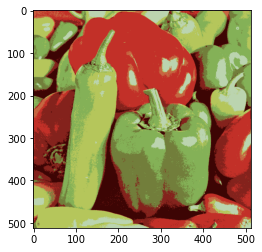

In [10]:
plt.imshow(imagecomp)